# Tabular Prototype

By Monday 6/30, make an attempt at formulating and "solving" your proposed problem.

## Machine Learning


### Problem Formulation

* Remove unneed columns, for example:
    * duplicated
    * categorical features that were turned into one-hot.
    * features that identify specific rows, like ID number.
    * make sure your target is properly encoded also.
* Split training sample into train, validation, and test sub-samples.

### Train ML Algorithm

* You only need one algorithm for now. You can do more if you like.
* For now, focus on making it work, rather than best result.
* Try to get a non-trivial result.

### Evaluate Performance on Validation Sample

* Compute the usual metric for your ML task.
* Compute the score for the kaggle challenge.



In [3]:
import tabular_processing

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score, precision_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
df = pd.read_csv('parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
df = tabular_processing.preprocess(df)
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,0.312215,0.280197,...,0.332584,0.068307,0.511745,1.0,0.369155,0.960148,0.569875,0.585765,0.390661,0.497310
1,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,0.472887,0.444536,...,0.516048,0.059331,0.432577,1.0,0.470830,0.977024,0.703277,0.741337,0.473145,0.671326
2,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,0.390634,0.326212,...,0.443317,0.039596,0.496220,1.0,0.404416,1.000000,0.636745,0.686371,0.408819,0.596682
3,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,0.414278,0.354971,...,0.475478,0.040997,0.495936,1.0,0.416255,0.975885,0.695627,0.738089,0.436977,0.671949
4,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,0.499452,0.410025,...,0.584542,0.054174,0.455499,1.0,0.375159,0.992813,0.762472,0.513798,0.404336,0.757611


In [7]:
df.shape

(291, 23)

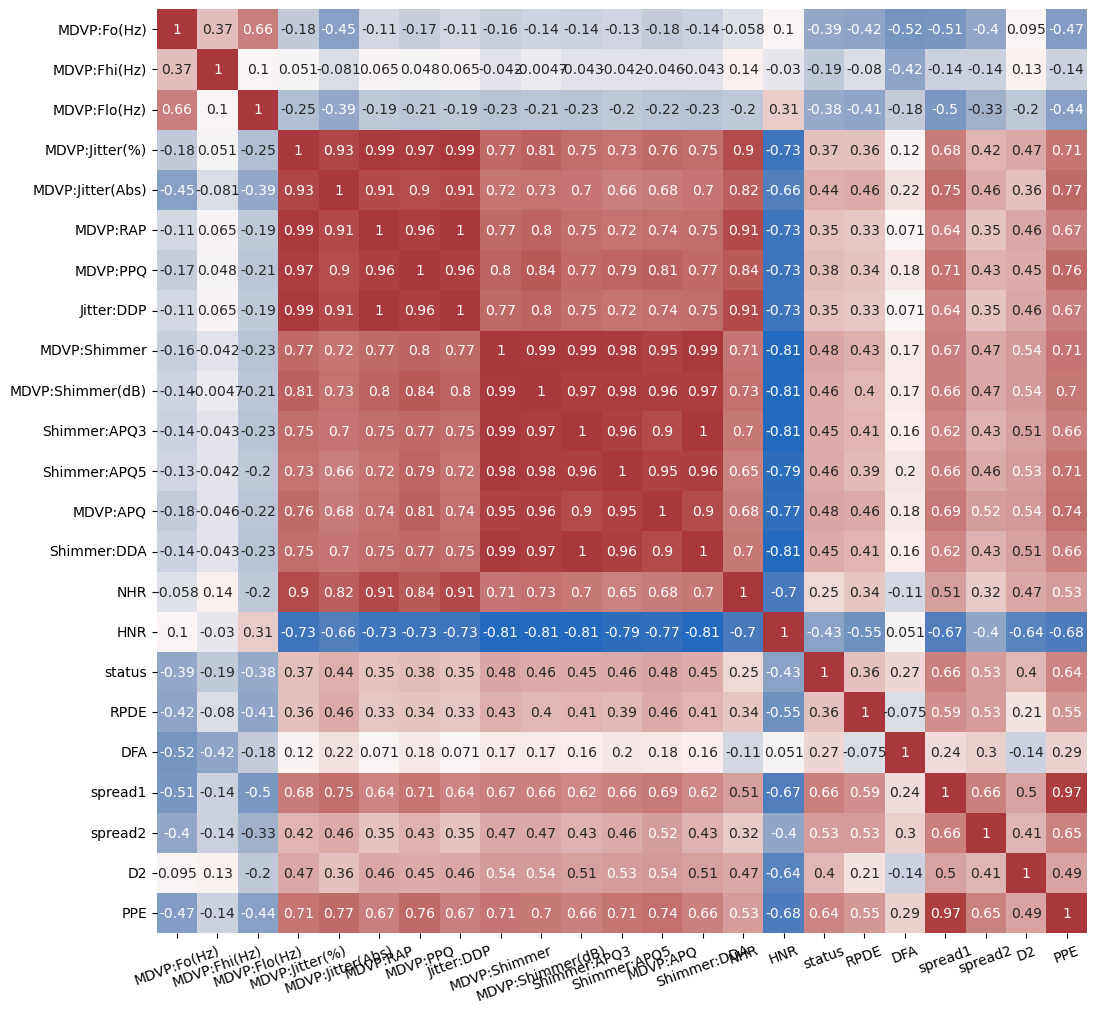

In [8]:
corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,cmap="vlag",annot=True,cbar=False)
plt.xticks(rotation=20)
plt.show()

### Feature Selection

In [10]:
df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [103]:
#xvars = ["HNR",'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)','DFA','MDVP:Jitter(%)','Shimmer:DDA']
#xvars = ["HNR",'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)','DFA']
xvars = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']
##xvars = ["PPE","D2"] #selection based on original article

    Selections mostly had similar results^

In [106]:
x=df[xvars].values 
y=df["status"].values #target variable

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) 

### Modeling

In [109]:
# ROC AUC

In [111]:
model = DecisionTreeClassifier()

scores = cross_val_score(model, x, y, cv=5, scoring=make_scorer(roc_auc_score))
print("Cross-validated AUC scores:", list(scores))
print("Mean CV AUC:", scores.mean())

Cross-validated AUC scores: [0.95, 0.9833333333333334, 0.9310344827586207, 0.8448275862068966, 0.9482758620689655]
Mean CV AUC: 0.9314942528735631


In [113]:
# Precision

In [115]:
model = DecisionTreeClassifier() 

scores = cross_val_score(model, x, y, cv=5, scoring=make_scorer(precision_score))
print("Cross-validated Precision scores:", list(scores))
print("Mean CV Precision:", scores.mean())

Cross-validated Precision scores: [1.0, 1.0, 1.0, 1.0, 1.0]
Mean CV Precision: 1.0


    Extreme overfitting observed

In [118]:
model = DecisionTreeClassifier(max_depth=10,min_samples_leaf=5) #hyperparameter tuning

scores = cross_val_score(model, x, y, cv=5, scoring=make_scorer(precision_score))
print("Cross-validated Precision scores:", list(scores))
print("Mean CV Precision:", scores.mean())

Cross-validated Precision scores: [0.9583333333333334, 0.9285714285714286, 0.9166666666666666, 1.0, 0.92]
Mean CV Precision: 0.9447142857142857


#### KNN

In [121]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier(n_neighbors=3)

scores = cross_val_score(model_KNN, x, y, cv=5, scoring=make_scorer(roc_auc_score))
print("KNN, k=3:\nCross-validated AUC scores:", list(scores))
print("Mean CV AUC:", scores.mean())

scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), x, y, cv=5, scoring=make_scorer(roc_auc_score))
print("\nKNN, k=5:\nCross-validated AUC scores:", list(scores))
print("Mean CV AUC:", scores.mean())

scores = cross_val_score(KNeighborsClassifier(n_neighbors=7), x, y, cv=5, scoring=make_scorer(roc_auc_score))
print("\nKNN, k=7:\nCross-validated AUC scores:", list(scores))
print("Mean CV AUC:", scores.mean())

KNN, k=3:
Cross-validated AUC scores: [0.9333333333333333, 0.9333333333333333, 0.8793103448275862, 0.7241379310344828, 0.8620689655172413]
Mean CV AUC: 0.8664367816091954

KNN, k=5:
Cross-validated AUC scores: [0.8827586206896553, 0.8416666666666667, 0.8448275862068964, 0.6551724137931034, 0.7758620689655172]
Mean CV AUC: 0.8000574712643678

KNN, k=7:
Cross-validated AUC scores: [0.9160919540229886, 0.8095238095238095, 0.8620689655172414, 0.6724137931034483, 0.793103448275862]
Mean CV AUC: 0.8106403940886701


## Future Work

- variance/mean dist for each patient per feature --> histogram
- "one left behind" train/test
- oversampled vs not
- limit trees